In [20]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

# generate data set

In [21]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0, 1, (num_examples, num_inputs)))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.from_numpy(np.random.normal(0, 0.01, size=labels.size()))

In [22]:
print(features[0], labels[0])

tensor([ 0.0035, -0.9280], dtype=torch.float64) tensor(7.3689, dtype=torch.float64)


# display data

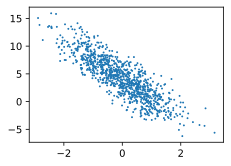

In [23]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

# read data

In [24]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [25]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-1.6215, -0.1067],
        [ 1.4111, -0.0800],
        [-0.0944,  0.6975],
        [-0.4972, -0.2445],
        [-2.5754,  0.1566],
        [-1.0575,  0.3571],
        [ 1.5339, -0.2327],
        [ 0.5873,  1.3309],
        [ 0.4236,  0.9279],
        [-0.2012, -0.5271]], dtype=torch.float64) tensor([ 1.3245,  7.3036,  1.6410,  4.0407, -1.4964,  0.8820,  8.0674,  0.8439,
         1.9035,  5.5844], dtype=torch.float64)


# initiate params

In [26]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float64)
b = torch.zeros(1, dtype=torch.float64)

In [27]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], dtype=torch.float64, requires_grad=True)

# define model

In [28]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [29]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [32]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

# train model

In [33]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)

        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.041528
epoch 2, loss 0.000164
epoch 3, loss 0.000046


In [34]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9994],
        [-3.3990]], dtype=torch.float64, requires_grad=True)
4.2 
 tensor([4.1993], dtype=torch.float64, requires_grad=True)
